In [13]:
#Q1.1
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from scipy.integrate import odeint
def mmp(y, t, params):
    au,av,Iu, Iv, k,n,b= params
    u,v= y
    dydt= np.empty(len(y))
    dydt[0]= -u+au/(1+(v/(1+Iv/k)**n)**b) #repressor u
    dydt[1]= -v+av/(1+(u/(1+Iu/k)**n)**b) #repressor v
    return dydt
def plothill(n,b):
    t1= np.linspace(0, 50,100)
    t2=np.linspace(50,100,100)
    t3=np.linspace(100,150,100)
    t4=np.linspace(150,200,100)
    yi= np.array([0,0])
    params1= np.array([10,9,100,0,3,n,b])
    params2= np.array([10,9,0,0,3,n,b])
    params3= np.array([10,9,0,100,3,n,b])
    params4= np.array([10,9,0,0,3,n,b])
    y1= odeint(mmp, yi, t1, args= (params1,))
    y2= odeint(mmp,y1[-1],t2, args = (params2,))
    y3= odeint(mmp,y2[-1],t3, args = (params3,))
    y4= odeint(mmp,y3[-1],t4, args = (params4,))

In [14]:
def plothill(n,b):
    t1= np.linspace(0, 50,100)
    t2=np.linspace(50,100,100)
    t3=np.linspace(100,150,100)
    t4=np.linspace(150,200,100)
    yi= np.array([0,0])
    params1= np.array([10,9,100,0,3,n,b])
    params2= np.array([10,9,0,0,3,n,b])
    params3= np.array([10,9,0,100,3,n,b])
    params4= np.array([10,9,0,0,3,n,b])
    y1= odeint(mmp, yi, t1, args= (params1,))
    y2= odeint(mmp,y1[-1],t1, args = (params2,))
    y3= odeint(mmp,y2[-1],t1, args = (params3,))
    y4= odeint(mmp,y3[-1],t1, args = (params4,))
    plt.figure()
    plt.plot(t1, y1[:,1],'r')
    plt.plot(t1, y1[:,0],'b')
    plt.plot(t2, y2[:,1],'r')
    plt.plot(t2, y2[:,0],'b')
    plt.plot(t3, y3[:,1],'r')
    plt.plot(t3, y3[:,0],'b')
    plt.plot(t4, y4[:,1],'r')
    plt.plot(t4, y4[:,0],'b')
    plt.xlabel('time')
    plt.ylabel('concentration')
    plt.legend('vu')
    plt.title('Repressor concentration')
    plt.show()

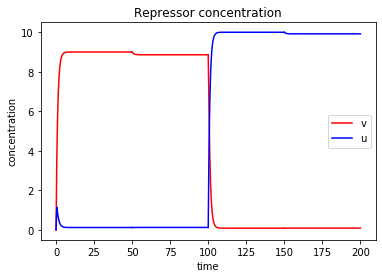

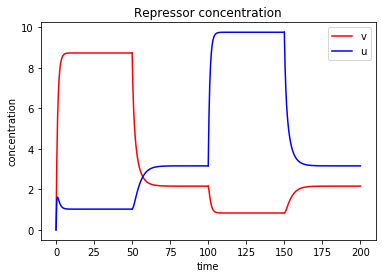

In [15]:
#Q1.2
plothill(2,2)
plothill(1,1)

Hysteresis behavior is observed in the model with hill number (HN)=2, since with the same parameters different initial values can lead to different stable states. When HN=2, if Iv=Iu=0 stable fixed points for du/dt=dv/dt=0 are about (0,9) and (10,0). Hence, the trajectories with different initial values approaches either fixed points. The stable fixed point for Iu=100 & Iv=0 and Iu=0 & Iv=100 are about (0,9) and (10,0) respectively. 

Hence, after applying high Iu and low Iv, we have the system stabilizing around (0,9), which stays after Iu drops to 0 since a stable fixed point for Iv=Iu=0 is also about (0,9). After applying high Iv and low Iu, we have the system stabilizing around (10,0), which stays after Iv drops to 0 since a stable fixed point for Iv=Iu=0 is also about (10,0).

When HN=1, du/dt=dv/dt=0 gives the only sulution (3.162,2.162) for the stable (u,v) when Iv=Iu=0 by solving u=10/(1+v) and v=9/(1+v). Similarly, Iu=100 & Iv=0 and Iu=0 & Iv=100 each has one stable solution at about (1,9), (10,1). There is only one stable fixed point for each setting so the initial value does not differentiate the end points of the trajectory. Thus, the fix points depend only on the parameters but not the initial values, and the concentrations exhibit no hystersis.

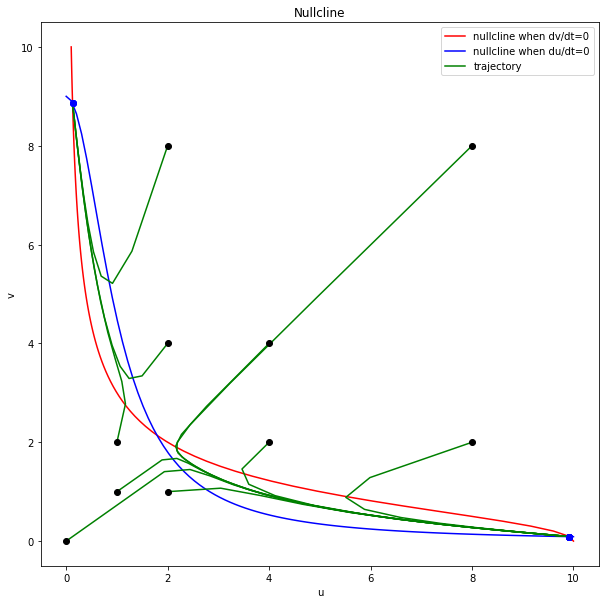

In [18]:
#Q1.3 
params= np.array([10,9,0,0,3,2,2])
au,av,Iu, Iv, k,n,b= params
vfixed=np.linspace(0,10,100)
ufixed=np.linspace(0,10,100)
u=au/(1+(vfixed/(1+Iv/k)**n)**b) #set dv/dt=0
v=av/(1+(ufixed/(1+Iu/k)**n)**b) #set du/dt=0
#set trajectories:
def trajectory(a,b):
    t1= np.linspace(0, 50,100)
    yi= np.array([a,b])
    y= odeint(mmp, yi, t1, args= (params,))
    return y
def plottraj(a,b):
    if j==0:
        plt.plot(trajectory(a,b)[:,0],trajectory(a,b)[:,1],'g',label='trajectory') #plot trajectory as(u,v)
        plt.plot(trajectory(a,b)[:,0][0],trajectory(a,b)[:,1][0],'ko') #mark the starting point as black
        plt.plot(trajectory(a,b)[:,0][-1],trajectory(a,b)[:,1][-1],'bo') #mark the end point as blue
    else:
        plt.plot(trajectory(a,b)[:,0],trajectory(a,b)[:,1],'g') #plot trajectory as(u,v)
        plt.plot(trajectory(a,b)[:,0][0],trajectory(a,b)[:,1][0],'ko') #mark the starting point as black
        plt.plot(trajectory(a,b)[:,0][-1],trajectory(a,b)[:,1][-1],'bo') #mark the end point as blue
j=0
plt.figure(figsize=[10,10])
plt.plot(u,vfixed,'r',label='nullcline when dv/dt=0')
plt.plot(ufixed,v,'b',label='nullcline when du/dt=0')
for i in [(8,8),(8,2),(2,8),(4,4),(4,2),(2,4),(2,1),(1,2),(1,1),(0,0)]:
    plottraj(i[0],i[1])
    j+=1
plt.legend()
plt.xlabel('u')
plt.ylabel('v')
plt.title('Nullcline')
plt.show()

The fixed pint at [0.126,8.860] and [10,0] are stable since trajectories are attracted to approach them indefinitely. On the contrary, the other fixed point at about [2,2] is not stable since the trajectories are deviated from it.

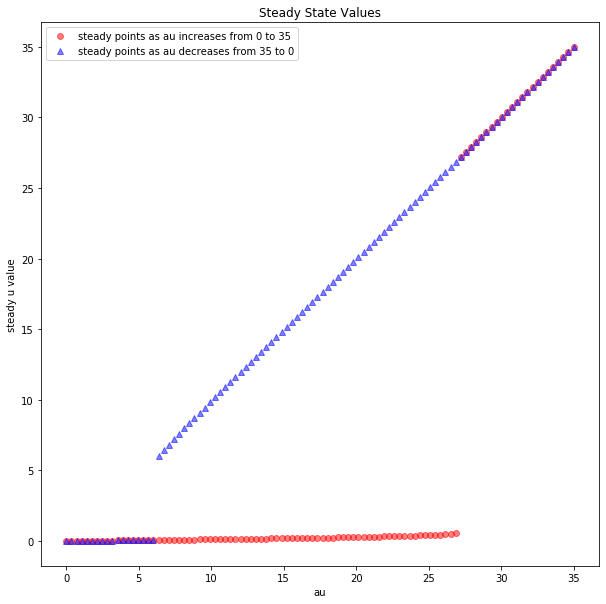

In [5]:
#Q1.4
def test(a,b,c):
    params_4= np.array([c,9,0,0,3,2,2])
    t1= np.linspace(0, 50,100)
    yi= np.array([a,b])
    y= odeint(mmp, yi, t1, args= (params_4,))
    return y[-1]
def ssvalue(a,b,c):
    if i ==0:
        plt.plot(i,test(a,b,c)[0],'ro', alpha=0.5,label='steady points as au increases from 0 to 35')
    else:
        plt.plot(i,test(a,b,c)[0],'ro', alpha=0.5)
def ssvalue2(a,b,c):
    if i ==0:
        plt.plot(i,test(a,b,c)[0],'b^', alpha=0.5,label='steady points as au decreases from 35 to 0') 
    else:
        plt.plot(i,test(a,b,c)[0],'b^', alpha=0.5) 
plt.figure(figsize=[10,10])
plt.xlabel('au')
plt.ylabel('steady u value')
for i in np.linspace(0, 35,100): #plot steady points as au increases from 0 to 35 in red
    if i==0:
        init=[2,8]
    else:
        intermediate=test(init[0],init[1],i)
        init=intermediate
    ssvalue(init[0],init[1],i) #the red line, going from 0 to 35
for i in np.linspace(35, 0,100): #plot steady points as au decreases from 35 to 0 in blue
    if i==0:
        init=[2,8]
    else:
        intermediate=test(init[0],init[1],i-1)
        init=intermediate
    ssvalue2(init[0],init[1],i) #the blue line, going from 35 to 0
plt.legend()
plt.title('Steady State Values')
plt.show()

For a stabilized system, rising au from 0 to 35 results in a shift from the lower fixed point around 0 to the higher fixed point (on state) at where au roughly equals 27.5. Decreasing au from 35 to 0 results in a shift from the higher fixed point to the lower fixed point (off state) at where au roughly equals 6.364. Thus, for au larger then 6.364, once the switch is thrown on it cannot be reset since it cannot move from the higher to the lower fixed point. 

#Q2.1Suppose the first gene is expressed at high level, it represses the expression of the second gene. Since the expression of the second gene is downregulated, the expression of the third gene is upregulated, which in turn represses the first gene. Hence, at the end of the cycle, the first gene is downregulated. The same logic applies to each gene at either up or down regualted state. Thus, we conclude that the triplet stabalizes each other's expression level. 

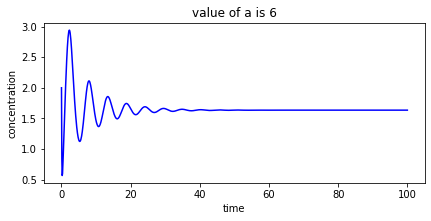

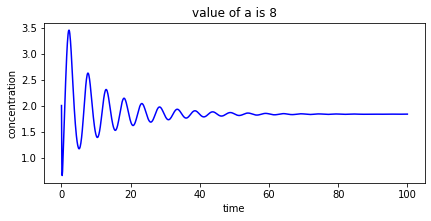

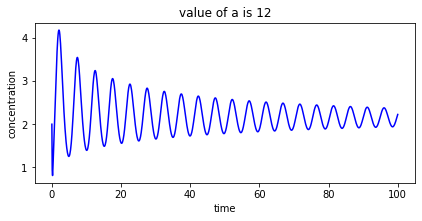

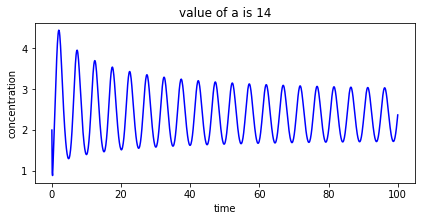

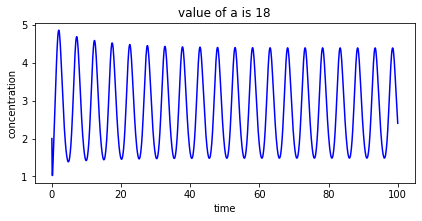

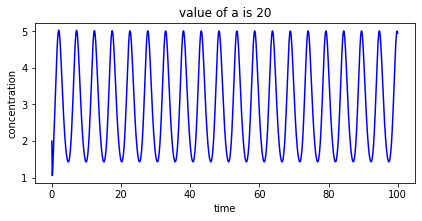

In [33]:
#Q2.2
def mmp(y, t, params):
    a, b= params
    m1,m2,m3,p1,p2,p3= y
    dydt= np.empty(len(y))
    dydt[0]= -m1+a/(1+p3**2) 
    dydt[1]= -m2+a/(1+p1**2)
    dydt[2]= -m3+a/(1+p2**2)
    dydt[3]=-b*(p1-m1)
    dydt[4]=-b*(p2-m2)
    dydt[5]=-b*(p3-m3)
    return dydt
def protconc1(a,b):
    t=np.linspace(0,100,1000)
    mp= np.array([1,0,3,1,2,0])
    ab= np.array([a,10])
    y1= odeint(mmp, mp, t, args= (ab,))
    plt.figure(figsize=(15,10))
    plt.subplot(b)
    plt.plot(t, y1[:,4],'b')
    plt.xlabel('time')
    plt.ylabel('concentration')
    c='value of a is '+str(a)
    plt.title(c)
protconc1(6,321)
protconc1(8,322)
protconc1(12,323)
protconc1(14,324)
protconc1(18,325)
protconc1(20,326)
plt.show()

In [8]:
#Q2.3
a=np.logspace(0,3,20)
b=np.logspace(-1,3,20)
def protconc2(a,b):
    t=np.linspace(0,100,100)
    mp= np.array([1,0,3,1,2,0])
    ab= np.array([a,b])
    y1= odeint(mmp, mp, t, args= (ab,))
    return y1[90:,4]
abb=[]
s=[]
for i in list(range(20)):
    for j in list(range(20)):
        s+=[np.mean(np.absolute(np.diff(protconc2(a[i],b[j]))))]
s=np.array(s).reshape(20,20)

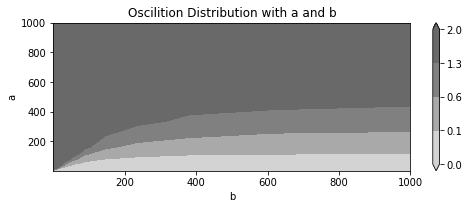

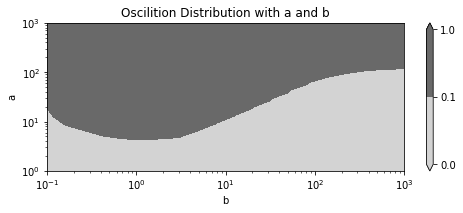

In [20]:
a=np.logspace(0,3,20)
b=np.logspace(-1,3,20)
plt.figure(figsize=(8,6))
plt.subplot(211)
cs = plt.contourf(b,a,s, levels=[0,0.1,0.6,1.3,2], colors=['lightgrey','darkgray','gray','dimgray'],extend='both')
cs.cmap.set_over('dimgrey')
cs.cmap.set_under('lightgrey')
plt.xscale('linear')
plt.yscale('linear')
plt.xlabel('b')
plt.ylabel('a')
plt.title('Oscilltion Distribution with a and b')
plt.colorbar()
plt.figure(figsize=(8,6))
plt.subplot(212)
cs = plt.contourf(b,a,s, levels=[0,0.1,1], colors=['lightgrey','dimgray'],extend='both')
cs.cmap.set_over('dimgrey')
cs.cmap.set_under('lightgrey')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('b')
plt.ylabel('a')
plt.title('Oscilltion Distribution with a and b')
plt.colorbar()

Define the threshold for fluctuation per unit time as 0.1. Systems with dp1/dt > 0.1 are oscillating. When a > 165 (approximation), limit cycles are observed for all 0.1 < b <1000, whereas when a < 4.5 (approximation), steady states are observed for all 0.1 < b <1000. 

At equilibrium, dmi/dt=dpi/dt=0. Hence, a/(1+sq(pi-1*))=mi* for mi* at the stable fixed point. The method employed to solve the ODE entails that the feedback is delayed, and the strength of the feedback depends on a. If a/(1+sq(pi-1*)) is large and pi-1 does not equal pi-1*, a/(1+sq(pi-1)) tends to significantly overshoot or undershoot the desired mi* value. In other words, larger a hinders finetuned adjustment of mRNA and protein concentrations and impedes reaching the stable fixed point. Thus, pi and mi oscillate above and below that value.  

The minimal a (about 5) to initiate an oscillation occurs around b=1, where protein and mRNA have the same lifetime. Larger a is required as protein lifetime deviates more from the mRNA lifetime. If b < 1, dpi/dt is small and allows finer adjustment of pi concentrations, which can arrive at the fixed point easier. For a<11 (approximation), with finer pi and mi feedback the system could be stabilized, yet larger a offset the effect of finetuned pi feedbacks due to b (when b >=0.1).  

If b >1, the protein is degraded slower than the mRNA and accumulates at higher concentration. Hence a/(1+sq(pi-1*)) becomes smaller and leads to finer mi feedback and stabilization if a is not large enough to offset the effect by scaling up a/(1+sq(pi-1*)). 
 

In [23]:
#not part of the answer. An investigation of the effect of smaller b:
x=np.logspace(0,3,20)
y=np.logspace(-3,3,50)
def protconc2(a,b):
    t=np.linspace(0,100,100)
    mp= np.array([1,0,3,1,2,0])
    ab= np.array([a,b])
    y1= odeint(mmp, mp, t, args= (ab,))
    return y1[90:,4]
z=[]
for i in list(range(20)):
    for j in list(range(50)):
        z+=[np.mean(np.absolute(np.diff(protconc2(x[i],y[j]))))]
z=np.array(z).reshape(20,50)

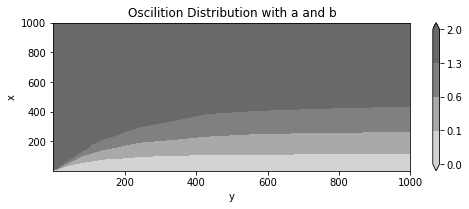

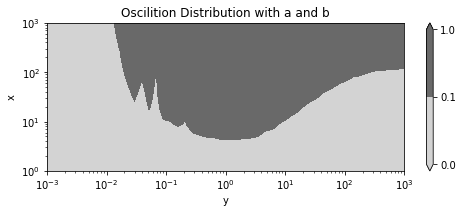

In [27]:
#the effect of even smaller b
plt.figure(figsize=(8,6))
plt.subplot(211)
cs = plt.contourf(y,x,z, levels=[0,0.1,0.6,1.3,2], colors=['lightgrey','darkgray','gray','dimgray'],extend='both')
cs.cmap.set_over('dimgrey')
cs.cmap.set_under('lightgrey')
plt.xscale('linear')
plt.yscale('linear')
plt.xlabel('y')
plt.ylabel('x')
plt.title('Oscilltion Distribution with a and b')
plt.colorbar()
plt.figure(figsize=(8,6))
plt.subplot(212)
cs = plt.contourf(y,x,z, levels=[0,0.1,1], colors=['lightgrey','dimgray'],extend='both')
cs.cmap.set_over('dimgrey')
cs.cmap.set_under('lightgrey')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('y')
plt.ylabel('x')
plt.title('Oscilltion Distribution with a and b')
plt.colorbar()